<a href="https://colab.research.google.com/github/hbbspace/PVCK_2024/blob/main/Week_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MODUL 6 – Histogram, Histogram Equalization, Dithering

## Tugas Praktikum

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


2. Import beberapa library berikut yang akan digunakan selama uji coba praktikum
minggu ke-6 berikut.

In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt
import os
from skimage import io
import math
import glob
from PIL import Image

3. Buatlah histogram citra seperti output histogram berikut berdasarkan flowchart di
bawah ini : (Gunakan gambar lena.jpg)

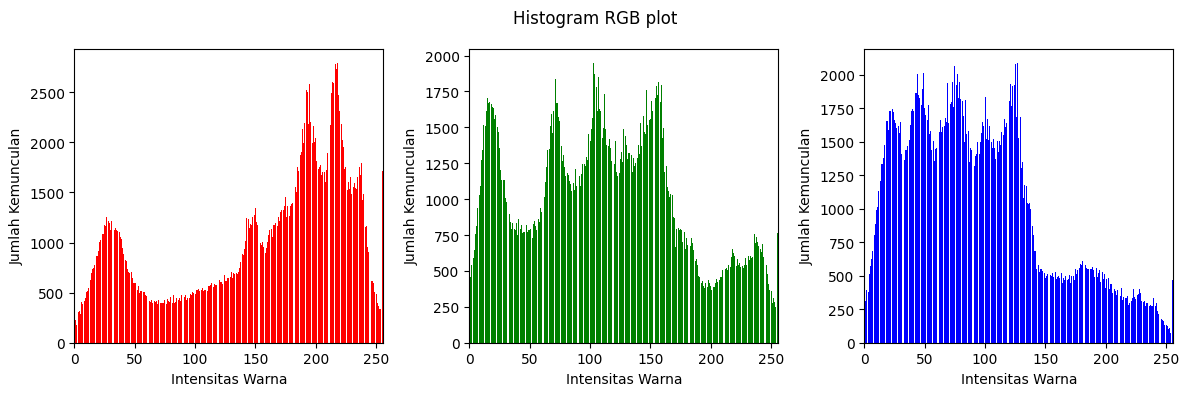

In [ ]:
image = cv.imread('/content/drive/MyDrive/lena.jpg')

# Memisahkan channel RGB
blue_ch = image[:, :, 0]
green_ch = image[:, :, 1]
red_ch = image[:, :, 2]

# Menghitung histogram masing-masing channel
histogram_red = np.zeros(256, dtype=int)
histogram_green = np.zeros(256, dtype=int)
histogram_blue = np.zeros(256, dtype=int)

for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        pixel_value_red = red_ch[i, j]
        pixel_value_green = green_ch[i, j]
        pixel_value_blue = blue_ch[i, j]

        histogram_red[pixel_value_red] += 1
        histogram_green[pixel_value_green] += 1
        histogram_blue[pixel_value_blue] += 1

# Menampilkan histogram channel RGB dalam bentuk bar
plt.figure(figsize=(12, 4))
plt.suptitle('Histogram RGB plot')

plt.subplot(131)
plt.bar(range(256), histogram_red, color='red')
plt.xlabel('Intensitas Warna')
plt.ylabel('Jumlah Kemunculan')
plt.xlim([0, 256])

plt.subplot(132)
plt.bar(range(256), histogram_green, color='green')
plt.xlabel('Intensitas Warna')
plt.ylabel('Jumlah Kemunculan')
plt.xlim([0, 256])

plt.subplot(133)
plt.bar(range(256), histogram_blue, color='blue')
plt.xlabel('Intensitas Warna')
plt.ylabel('Jumlah Kemunculan')
plt.xlim([0, 256])

plt.tight_layout()
plt.show()

4. Setelah mengerjakan soal no. 3, buatlah histogram citra yang sama akan tetapi
menggunakan library yang dimiliki oleh NumPy yaitu “histogram”. Bandingkan
hasilnya. Apakah output muncul sama?

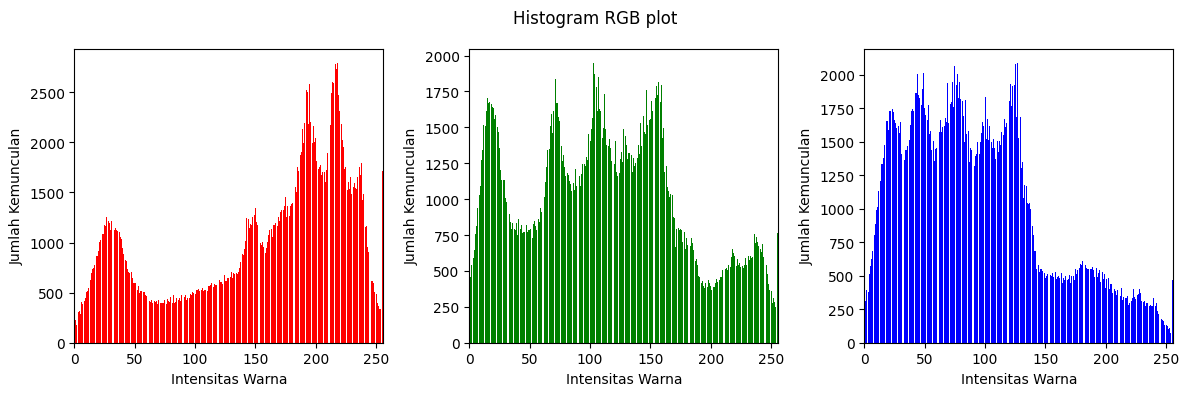

In [ ]:
image = cv.imread('/content/drive/MyDrive/lena.jpg')

# Memisahkan channel RGB
blue_ch = image[:, :, 0]
green_ch = image[:, :, 1]
red_ch = image[:, :, 2]

# Menghitung histogram masing-masing channel
histogram_red, _ = np.histogram(red_ch, bins=256, range=(0, 256))
histogram_green, _ = np.histogram(green_ch, bins=256, range=(0, 256))
histogram_blue, _ = np.histogram(blue_ch, bins=256, range=(0, 256))

# Menampilkan histogram channel RGB dalam bentuk bar
plt.figure(figsize=(12, 4))
plt.suptitle('Histogram RGB plot')

plt.subplot(131)
plt.bar(range(256), histogram_red, color='red')
plt.xlabel('Intensitas Warna')
plt.ylabel('Jumlah Kemunculan')
plt.xlim([0, 256])

plt.subplot(132)
plt.bar(range(256), histogram_green, color='green')
plt.xlabel('Intensitas Warna')
plt.ylabel('Jumlah Kemunculan')
plt.xlim([0, 256])

plt.subplot(133)
plt.bar(range(256), histogram_blue, color='blue')
plt.xlabel('Intensitas Warna')
plt.ylabel('Jumlah Kemunculan')
plt.xlim([0, 256])

plt.tight_layout()
plt.show()

Berdasarkan hasil output pada soal 3 dan 4, hasilnya sama

5. Buatlah histogram citra seperti output histogram equalization dan juga tampilan
gambar sebelum dan sesudah proses histogram equalization berikut berdasarkan
flowchart di bawah ini : (Gunakan gambar lena_lc.jpg)

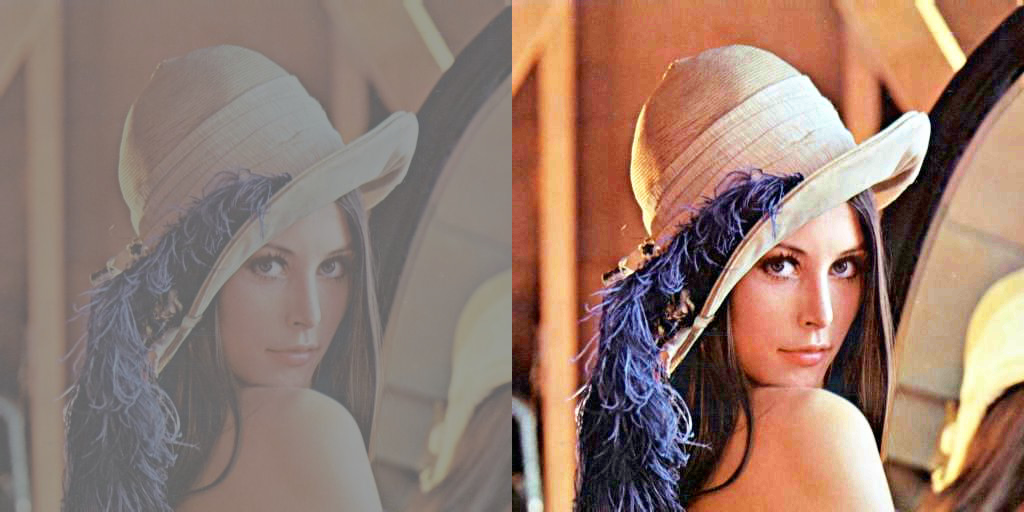

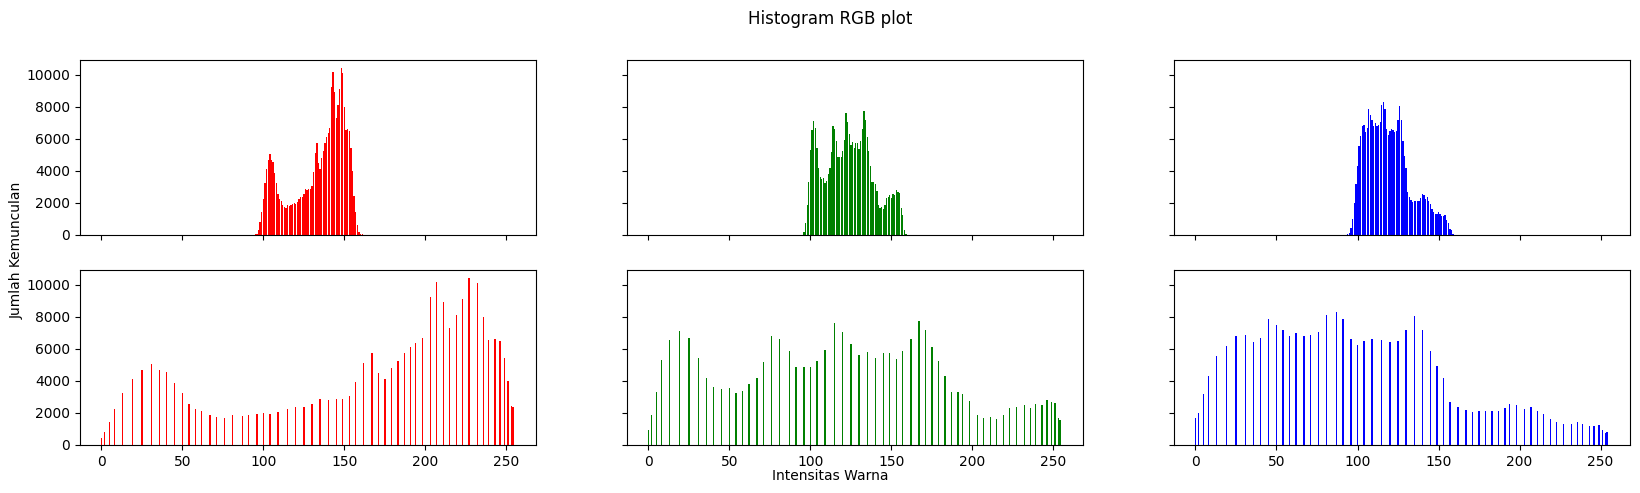

In [ ]:
img = cv.imread('/content/drive/MyDrive/lena_lc.jpg')

def histog(img):
    height, width, depth = np.shape(img)
    ax = np.zeros((3, 256))
    for y in range(0, height):
        for x in range(0, width):
            ax[0][img[y][x][0]] += 1
            ax[1][img[y][x][1]] += 1
            ax[2][img[y][x][2]] += 1
    return ax

histo_asli = histog(img)

# Konversi ke Numpy array
img_array = np.asarray(img)

# Menghitung jumlah kemunculan setap pixel warna pada nilai tertentu
histogram_array = np.bincount(img_array.flatten(), minlength=256)

# Penjumlahan kumulatif dari frekuensi yang sudah diketahui, kemudian dibagi dengan jumlah pixel
num_pixels = np.sum(histogram_array)
histogram_array = histogram_array / num_pixels

# Normalisasi dengan kumulatif frekuensi seluruh pixel yang sudah diketahui setelah dibagi jumlah pixel
chistogram_array = np.cumsum(histogram_array)

#  Implementasi rumus K0
transform_map = np.floor(255 * chistogram_array).astype(np.uint8)

# Transformasi kembali dalam bentuk citra
img_list = list(img_array.flatten())

eq_img_list = [transform_map[p] for p in img_list]

eq_img_array = np.reshape(np.asarray(eq_img_list), img_array.shape)
img2 = eq_img_array

# Hasil Histogram Equalization
equal_histo = histog(img2)

# Citra Hasil Histogram Equalization
final_frame = cv.hconcat((img, img2))
cv2_imshow(final_frame)

names = np.arange(256)
isgrayimg = np.array_equal(img[:, :, 0], img[:, :, 1]) and np.array_equal(img[:, :, 0], img[:, :, 2])
if not isgrayimg:
    fig, axs = plt.subplots(2, 3, figsize=[20, 5], sharex=True, sharey=True)
    fig.suptitle('Histogram RGB plot')
    fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
    fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
    axs[0, 0].bar(names, histo_asli[2], color='red')
    axs[0, 1].bar(names, histo_asli[1], color='green')
    axs[0, 2].bar(names, histo_asli[0], color='blue')
    axs[1, 0].bar(names, equal_histo[2], color='red')
    axs[1, 1].bar(names, equal_histo[1], color='green')
    axs[1, 2].bar(names, equal_histo[0], color='blue')
else:
    fig, axs = plt.subplots(1, 2, figsize=[20, 5], sharex=True, sharey=True)
    fig.suptitle('Histogram RGB plot')
    fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
    fig.text(0.5, 0.94, 'Intensitas Warna', ha='center')
    axs[0].bar(names, histo_asli[0], color='gray')
    axs[1].bar(names, equal_histo[0], color='gray')

plt.show()

6. Setelah mengerjakan soal no. 5, buatlah histogram citra yang sama akan tetapi menggunakan library yang dimiliki oleh CV2 yaitu “equalizeHist”. Bandingkan
hasilnya. Apakah output muncul sama?

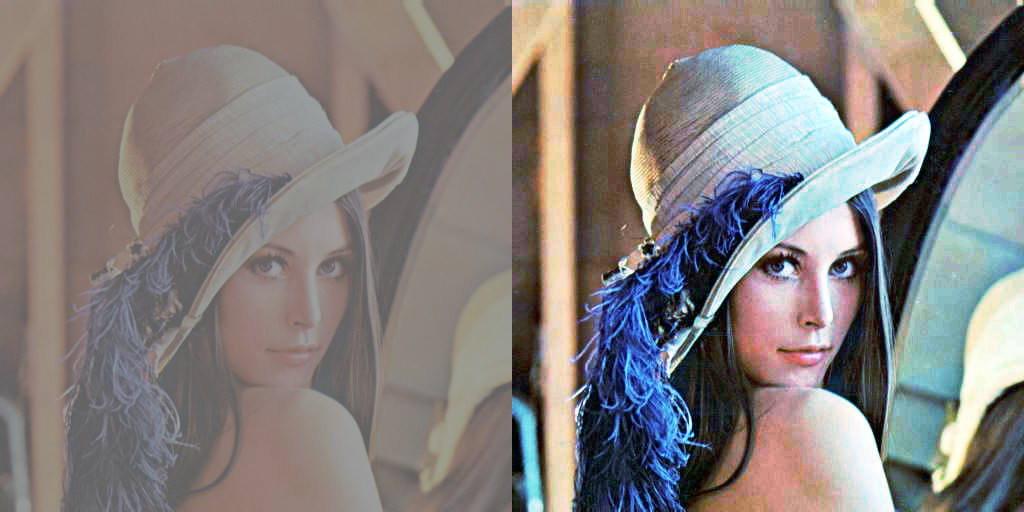

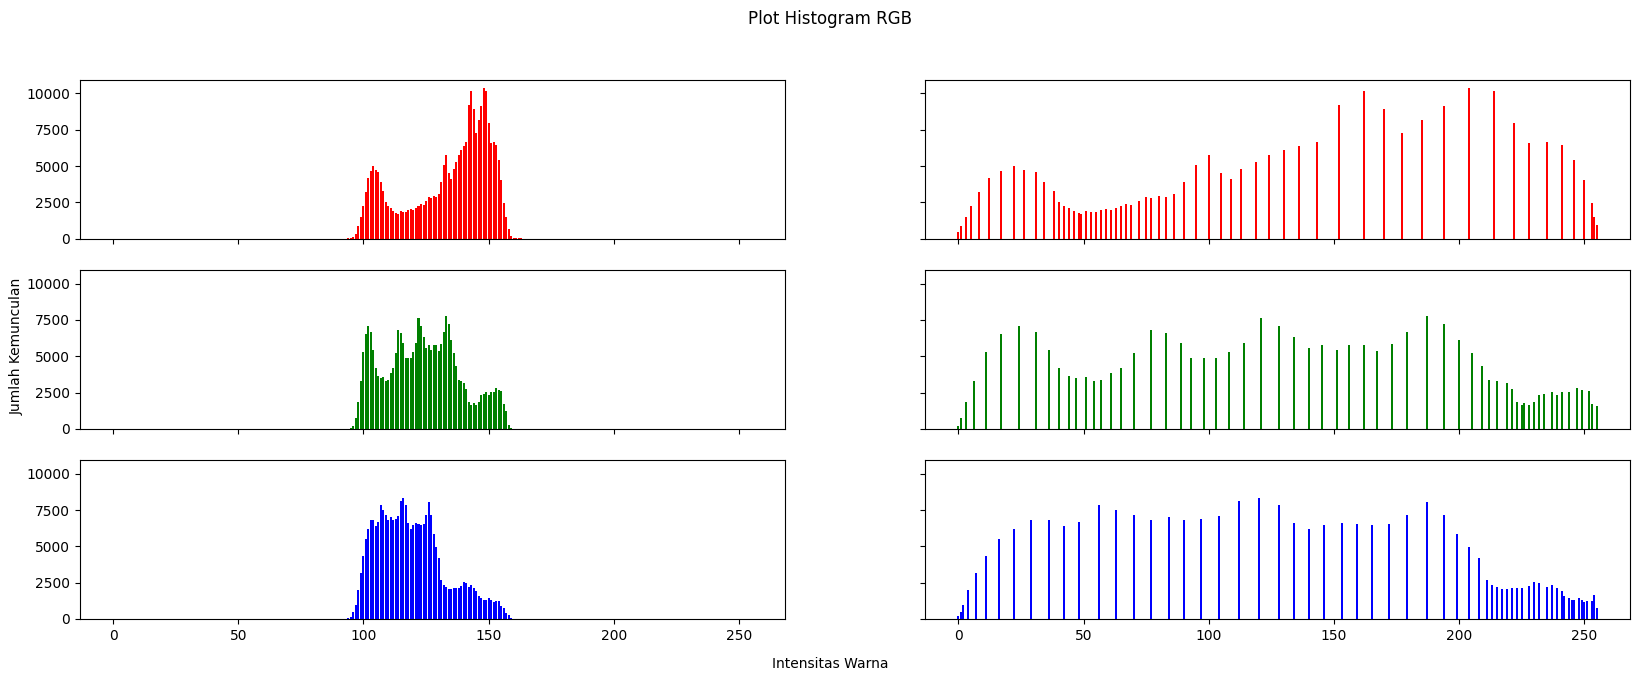

In [ ]:
img1 = cv.imread('/content/drive/MyDrive/lena_lc.jpg')

def histog(img1):
    height, width, depth = np.shape(img1)
    ax = np.zeros((3, 256))
    for y in range(0, height):
        for x in range(0, width):
            ax[0][img1[y][x][0]] += 1
            ax[1][img1[y][x][1]] += 1
            ax[2][img1[y][x][2]] += 1
    return ax

histo_asli = histog(img1)

# Membagi gambar menjadi saluran warna individual
blue_channel = img1[:, :, 0]
green_channel = img1[:, :, 1]
red_channel = img1[:, :, 2]

# Melakukan equalization histogram pada setiap saluran warna
equalized_blue = cv.equalizeHist(blue_channel)
equalized_green = cv.equalizeHist(green_channel)
equalized_red = cv.equalizeHist(red_channel)

# Menggabungkan kembali saluran warna yang telah di-equalize ke dalam gambar RGB
equalized_img = cv.merge([equalized_blue, equalized_green, equalized_red])

# Menghitung histogram untuk gambar asli dan gambar yang telah di-equalize
histo_equalized = histog(equalized_img)

# Menampilkan gambar asli dan yang telah di-equalize secara berdampingan
final_frame = cv.hconcat((img1, equalized_img))
cv2_imshow(final_frame)

# Membuat range untuk intensitas warna (0-255)
names = np.arange(256)

# Mengecek apakah gambar merupakan grayscale dengan memeriksa apakah semua saluran warna sama
isgrayimg = np.array_equal(blue_channel, green_channel) and np.array_equal(blue_channel, red_channel)

# Jika gambar bukan grayscale, plot histogram untuk setiap saluran warna (R, G, B)
if not isgrayimg:
    fig, axs = plt.subplots(3, 2, figsize=[20, 7], sharex=True, sharey=True)
    fig.suptitle('Plot Histogram RGB')
    fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
    fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
    axs[0, 0].bar(names, histo_asli[2], color='red')
    axs[0, 1].bar(names, histo_equalized[2], color='red')
    axs[1, 0].bar(names, histo_asli[1], color='green')
    axs[1, 1].bar(names, histo_equalized[1], color='green')
    axs[2, 0].bar(names, histo_asli[0], color='blue')
    axs[2, 1].bar(names, histo_equalized[0], color='blue')

# Jika gambar grayscale, plot histogram grayscale
else:
    fig, axs = plt.subplots(1, 2, figsize=[20, 5], sharex=True, sharey=True)
    fig.suptitle('Plot Histogram Grayscale')
    fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
    fig.text(0.5, 0.94, 'Intensitas Warna', ha='center')
    axs[0].bar(names, histo_asli[0], color='gray')
    axs[1].bar(names, histo_equalized[0], color='gray')

plt.show()


7. Lakukanlah proses pemetaan 16 juta warna RGB ke dalam 8 warna saja, yaitu hitam,
hijau, kuning, biru, cyan, magenta, putih seperti output berikut berdasarkan flowchart
di bawah ini! (Gunakan gambar lena.jpg)

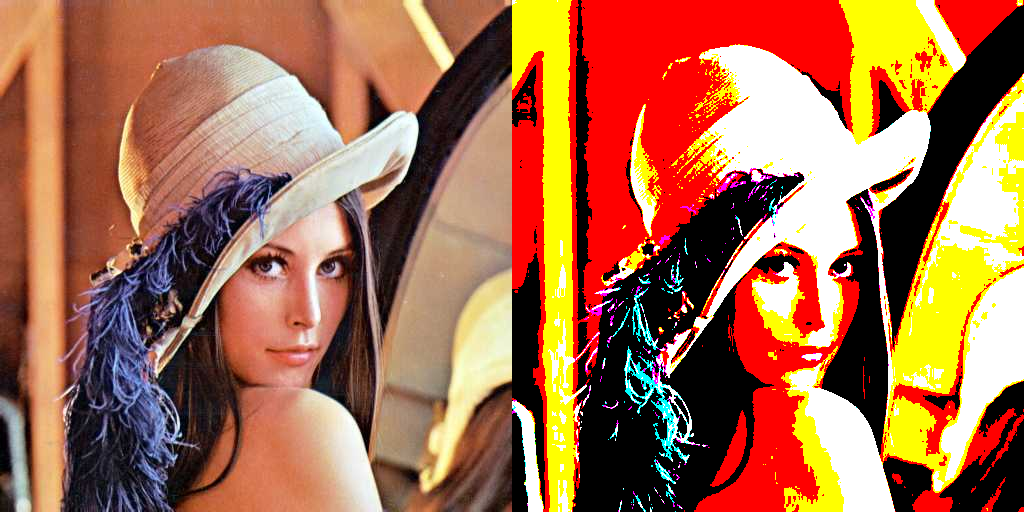

In [ ]:
# Membuat palet warna dengan 8 warna yang ditentukan
colors = {
    "black": (0, 0, 0),
    "green": (0, 255, 0),
    "yellow": (255, 255, 0),
    "blue": (0, 0, 255),
    "cyan": (0, 255, 255),
    "magenta": (255, 0, 255),
    "white": (255, 255, 255),
}

# Membaca gambar "lena.jpg"
img = cv.imread('/content/drive/MyDrive/lena.jpg')

# Menyalin gambar asli untuk ditampilkan di sebelah kiri
original_img = img.copy()

# Mengganti setiap piksel gambar dengan warna terdekat dari palet
for x in range(img.shape[0]):
    for y in range(img.shape[1]):
        pixel_color = tuple(img[x, y])
        min_dist = float('inf')
        nearest_color = None
        # Menghitung jarak antara warna piksel dengan setiap warna di palet
        for name, color in colors.items():
            dist = np.linalg.norm(np.array(pixel_color) - np.array(color))
            # Memilih warna dari palet yang paling mendekati warna piksel asli
            if dist < min_dist:
                min_dist = dist
                nearest_color = color
        img[x, y] = nearest_color

# Menampilkan gambar asli di sebelah kiri dan gambar yang telah diubah di sebelah kanan
combined_img = np.hstack((original_img, img))
cv2_imshow(combined_img)

8. Lakukanlah proses dithering Floyd and Steinberg seperti output berikut (tampilan image
awal, dan tampilan setelah dithering) berdasarkan flowchart di bagian bawah halaman
modul ini! (Gunakan gambar lena.jpg)

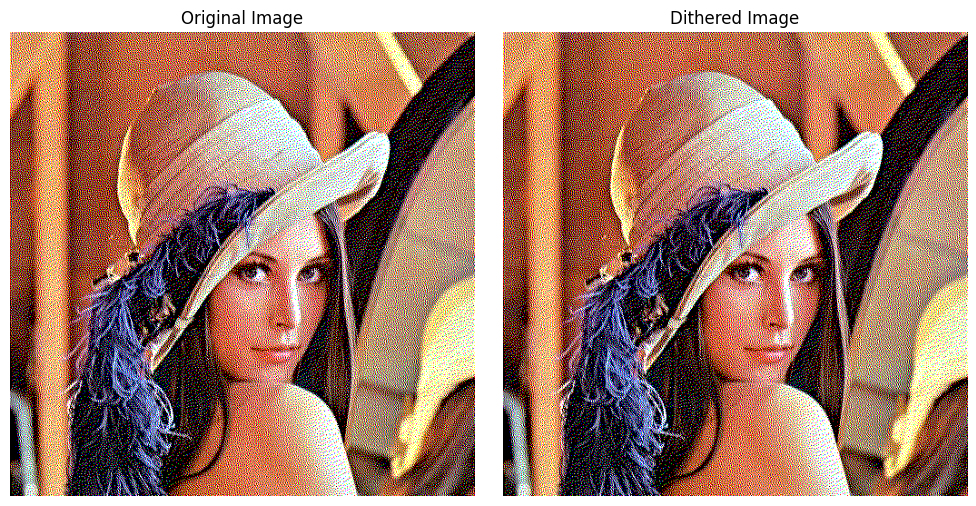

In [ ]:
def apply_dithering(image):
    width, height = image.size
    for y in range(height):
        for x in range(width):
            old_pixel = image.getpixel((x, y))
            new_pixel = quantize_pixel(old_pixel)
            image.putpixel((x, y), new_pixel)
            quant_error = calculate_quantization_error(old_pixel, new_pixel)
            distribute_error(image, x, y, quant_error)
    return image

def quantize_pixel(pixel):
    r, g, b = pixel
    new_r = round(r / 255) * 255
    new_g = round(g / 255) * 255
    new_b = round(b / 255) * 255
    return (new_r, new_g, new_b)

def calculate_quantization_error(old_pixel, new_pixel):
    r_old, g_old, b_old = old_pixel
    r_new, g_new, b_new = new_pixel
    quant_error_r = r_old - r_new
    quant_error_g = g_old - g_new
    quant_error_b = b_old - b_new
    return (quant_error_r, quant_error_g, quant_error_b)

def distribute_error(image, x, y, quant_error):
    width, height = image.size
    error_r, error_g, error_b = quant_error
    if x + 1 < width:
        new_pixel = image.getpixel((x + 1, y))
        image.putpixel((x + 1, y), (
            new_pixel[0] + (error_r * 7 // 16),
            new_pixel[1] + (error_g * 7 // 16),
            new_pixel[2] + (error_b * 7 // 16)
        ))
    if x - 1 >= 0 and y + 1 < height:
        new_pixel = image.getpixel((x - 1, y + 1))
        image.putpixel((x - 1, y + 1), (
            new_pixel[0] + (error_r * 3 // 16),
            new_pixel[1] + (error_g * 3 // 16),
            new_pixel[2] + (error_b * 3 // 16)
        ))
    if y + 1 < height:
        new_pixel = image.getpixel((x, y + 1))
        image.putpixel((x, y + 1), (
            new_pixel[0] + (error_r * 5 // 16),
            new_pixel[1] + (error_g * 5 // 16),
            new_pixel[2] + (error_b * 5 // 16)
        ))
    if x + 1 < width and y + 1 < height:
        new_pixel = image.getpixel((x + 1, y + 1))
        image.putpixel((x + 1, y + 1), (
            new_pixel[0] + (error_r * 1 // 16),
            new_pixel[1] + (error_g * 1 // 16),
            new_pixel[2] + (error_b * 1 // 16)
        ))

# Memuat gambar asli
input_image_path = ('/content/drive/MyDrive/lena.jpg')
input_image = Image.open(input_image_path)

# Menerapkan dithering
output_image = apply_dithering(input_image)

# Menampilkan gambar asli dan gambar yang sudah di-dither
plt.figure(figsize=(10, 5))

# Gambar asli
plt.subplot(1, 2, 1)
plt.imshow(input_image)
plt.title('Original Image')
plt.axis('off')

# Gambar dengan dithering
plt.subplot(1, 2, 2)
plt.imshow(output_image)
plt.title('Dithered Image')
plt.axis('off')

# Menampilkan plot gambar
plt.tight_layout()
plt.show()

9. Menggunakan lena_lc.jpg rubah menjadi grey image, kemudian terapkan histogram
equalization sehingga terjadi perbaikan sebaran warna pada citra. Setelah itu dari hasil
histogram equalization implementasikan proses dithering Floyd and Steinberg sehingga
menampilkan gambar di bawah ini!

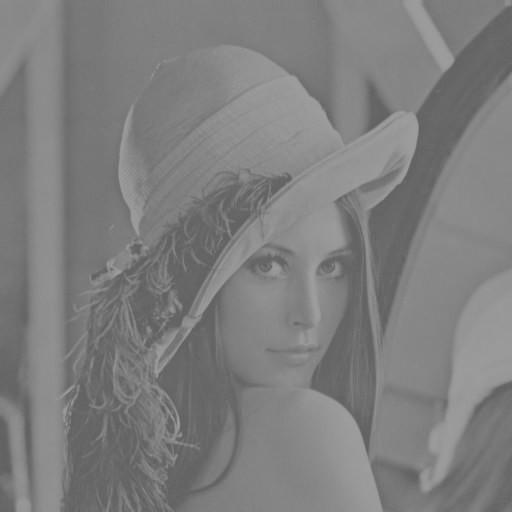

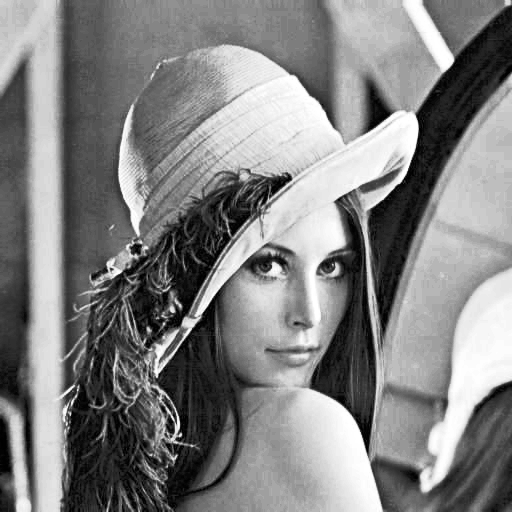

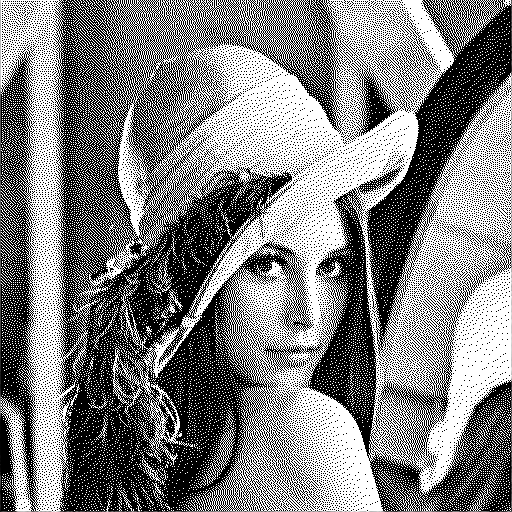

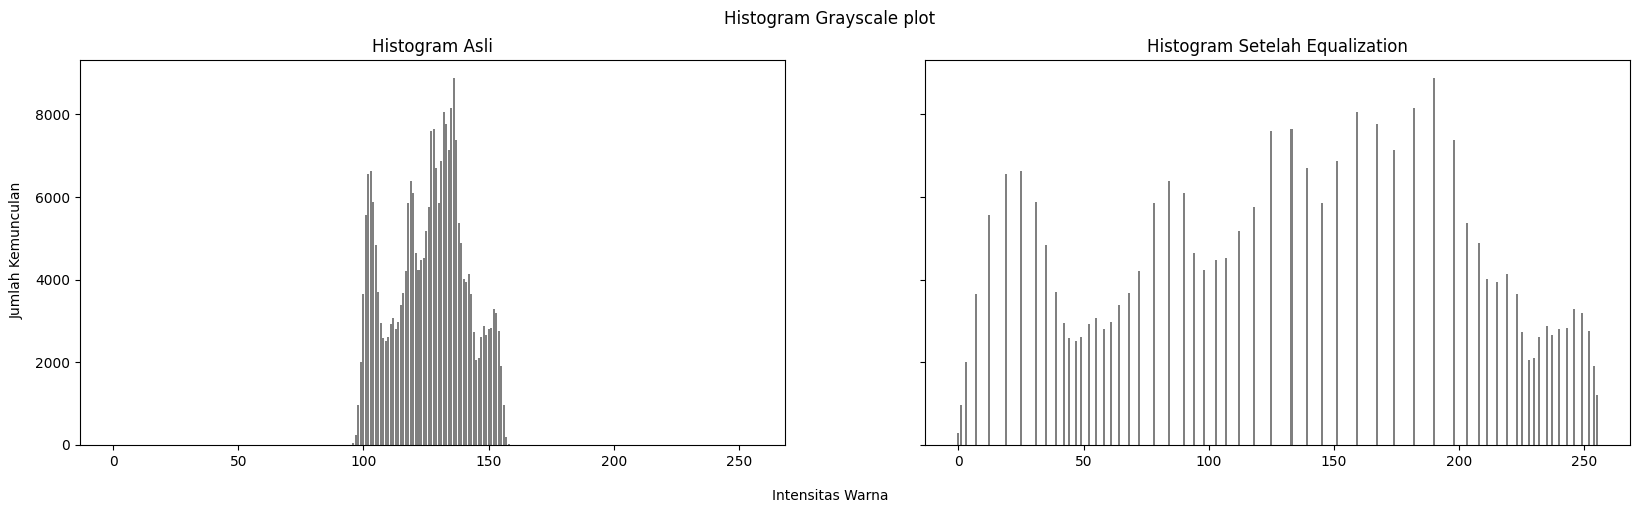

In [ ]:
image = cv.imread("/content/drive/MyDrive/lena_lc.jpg", cv.IMREAD_GRAYSCALE)

# Menerapkan histogram equalization pada gambar grayscale
equalized_image = cv.equalizeHist(image)

# Mengimplementasikan algoritma dithering Floyd-Steinberg
height, width = equalized_image.shape
dithered_image = np.copy(equalized_image)

# Menggunakan threshold untuk proses dithering (di sini level 0 dan 255)
threshold = 128  # Menggunakan threshold umum antara 0-255

# Loop melalui setiap piksel untuk menerapkan dithering Floyd-Steinberg
for y in range(height - 1):
    for x in range(1, width - 1):
        old_pixel = dithered_image[y, x]
        # Mengubah piksel ke 0 atau 255 berdasarkan nilai threshold
        new_pixel = 255 if old_pixel >= threshold else 0
        dithered_image[y, x] = new_pixel
        # Menghitung error kuantisasi
        quantization_error = old_pixel - new_pixel

        # Menyebarkan error ke piksel tetangga (dengan bobot Floyd-Steinberg)
        dithered_image[y, x + 1] = np.clip(dithered_image[y, x + 1] + quantization_error * 7 / 16, 0, 255)
        dithered_image[y + 1, x - 1] = np.clip(dithered_image[y + 1, x - 1] + quantization_error * 3 / 16, 0, 255)
        dithered_image[y + 1, x] = np.clip(dithered_image[y + 1, x] + quantization_error * 5 / 16, 0, 255)
        dithered_image[y + 1, x + 1] = np.clip(dithered_image[y + 1, x + 1] + quantization_error * 1 / 16, 0, 255)

# Menghitung histogram untuk gambar grayscale asli dan gambar hasil equalization
histo_asli = cv.calcHist([image], [0], None, [256], [0, 256])
histo_equalized = cv.calcHist([equalized_image], [0], None, [256], [0, 256])

# Menampilkan histogram grayscale asli dan setelah equalization
fig, axs = plt.subplots(1, 2, figsize=[20, 5], sharex=True, sharey=True)
fig.suptitle('Histogram Grayscale plot')
fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0, 'Intensitas Warna', ha='center')
axs[0].bar(range(256), histo_asli[:, 0], color='gray')
axs[1].bar(range(256), histo_equalized[:, 0], color='gray')
axs[0].set_title("Histogram Asli")
axs[1].set_title("Histogram Setelah Equalization")

# Menampilkan gambar asli, hasil equalization, dan hasil dithering Floyd-Steinberg
cv2_imshow(image)
cv2_imshow(equalized_image)
cv2_imshow(dithered_image)
print("\n\n")
